In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import digamma
from tqdm import tqdm

## Question 1

In [2]:
def norm_1(A):
    """
    Input: 2D numpy array
    Output: float
    """
    if A.shape[0] != A.shape[1]:
        raise ValueError("Input should be square.")
    
    # Take the absolute value of each entry
    # Get columns sum
    # n^2 complexity
    col_sum = np.sum(abs(A), axis=0) 


    # return the max of the col sum
    # n complexity
    return max(col_sum)

def norm_infinity(A):
    """
    Input: 2D numpy array
    Output: float
    """
    if A.shape[0] != A.shape[1]:
        raise ValueError("Input should be square.")
    
    # Take the absolute value of each entry
    # Get columns sum
    # n^2 complexity
    row_sum = np.sum(abs(A), axis=1) 


    # return the max of the col sum
    # n complexity
    return max(row_sum)


In [3]:
sizes = [int(100*(2**i)) for i in range(7)]
duration_1 = {}
duration_inf = {}
for size in sizes:
    A = np.random.random((size, size))
    start = time.time()
    norm_1(A)
    end = time.time()
    duration_1[size] = end - start

    start = time.time()
    norm_infinity(A)
    end = time.time()
    duration_inf[size] = end - start



In [4]:
print("\nFor 1 norm\n")
for i in range(7):
    print(f"The duration for {100*(2**i):4d} x {100*(2**i):4d} matrix is {duration_1[100*(2**i)]:.6f}")
print("\nFor infinity-norm\n")
for i in range(7):
    print(f"The duration for {100*(2**i):4d} x {100*(2**i):4d} matrix is {duration_inf[100*(2**i)]:.6f}")



For 1 norm

The duration for  100 x  100 matrix is 0.000358
The duration for  200 x  200 matrix is 0.000275
The duration for  400 x  400 matrix is 0.000971
The duration for  800 x  800 matrix is 0.003606
The duration for 1600 x 1600 matrix is 0.016091
The duration for 3200 x 3200 matrix is 0.084503
The duration for 6400 x 6400 matrix is 0.570026

For infinity-norm

The duration for  100 x  100 matrix is 0.000173
The duration for  200 x  200 matrix is 0.000176
The duration for  400 x  400 matrix is 0.000289
The duration for  800 x  800 matrix is 0.001526
The duration for 1600 x 1600 matrix is 0.006191
The duration for 3200 x 3200 matrix is 0.027819
The duration for 6400 x 6400 matrix is 0.240773


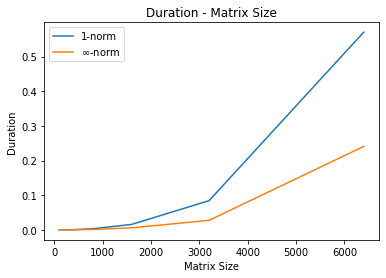

In [5]:
# Visualization
plt.plot(sizes, list(duration_1.values()), label = "1-norm")
plt.plot(sizes, list(duration_inf.values()), label = r"$\infty$-norm")
plt.xlabel("Matrix Size")
plt.ylabel("Duration")
plt.title("Duration - Matrix Size")
plt.legend()
plt.show()

From the result, we could say the flop will be increased roughly by factor 4 when the matrix size is doubeled, which is consistent with what we found analytically.

## Question 4

In [6]:
X = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.0, 2.5])
Y = np.array([0.0, 0.20, 0.27, 0.30, 0.32, 0.35, 0.27])
X_hat = np.ones((4, len(X)))
X_hat[0] = np.exp(X)
X_hat[1] = X**2
X_hat[2] = X
X_hat = X_hat.T

Let $\theta := [a,b,c,d]^{T}$.
The normal equation turns out to be
$$(\hat{X}^{T}\hat{X})\theta = \hat{X}^{T}Y$$

In [7]:
# Least Squaee estimation
# theta = np.linalg.inv(X_hat.T @ X_hat)@X_hat.T@Y
theta = np.linalg.solve(X_hat.T @ X_hat, X_hat.T@Y)

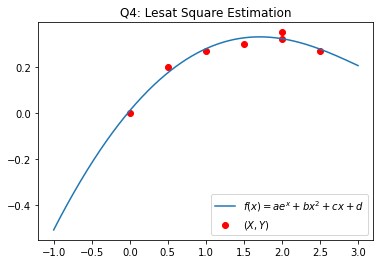

In [8]:
f = lambda z: theta[0]*np.exp(z) + theta[1]*(z**2) + theta[2]*z + theta[3]
x_space = np.linspace(-1, 3, 1000)
plt.plot(x_space, f(x_space), label = r"$f(x) = ae^x + b x^2 + cx + d$")
plt.scatter(X, Y, c="r", label=r"$(X, Y)$")
plt.title("Q4: Lesat Square Estimation")
plt.legend()
plt.show()

## Question 5

### Clarification
Since the runtime for $N = 2^{25}$ and more is huge, with the approval of the professor, we only do the part from $2^{1}$ to $2^{25}$

For $N\leq 25$ it only takes 

In [9]:
def H(N):
    result = np.single(0)
    for i in range(1, N+1):
        result += np.single(1)/np.single(i)
    return result


def H_ex(N):
    return digamma(N+1) - digamma(1)


# def relative_err(h, h_ex):
#     return abs(h - h_ex) / abs(h_ex)

In [10]:
h_ex_20 = np.zeros(25, dtype=np.double)

for i in tqdm(range(1, 26)):
    h_ex_20[i-1] = H_ex(2**i)

h_20 = np.zeros(25, dtype=np.single)

for i in tqdm(range(1, 26)):
    h_20[i-1] = H(2**i)

err_1 = abs(h_20 - h_ex_20) / abs(h_ex_20)

100%|██████████| 25/25 [01:04<00:00,  2.59s/it] 


<ipython-input-11-b18cacf9f3a0>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_space, np.log(err_1))


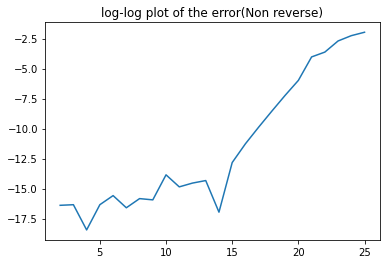

In [11]:
x_space = list(range(1, 26))
plt.plot(x_space, np.log(err_1))
plt.title("log-log plot of the error(Non reverse)")
plt.show()

Here we implememt the reversed order addition

In [12]:
def H_reverse(N):
    result = np.single(0)
    for i in range(N, 0, -1):
        result = np.single(1)/np.single(i) + result
    return result

In [13]:
h_20_reverse = np.zeros(25, dtype=np.single)

for i in tqdm(range(1, 26)):
    h_20_reverse[i-1] = H_reverse(2**i)

err_2 = abs(h_20_reverse - h_ex_20) / abs(h_ex_20)


100%|██████████| 25/25 [01:03<00:00,  2.56s/it] 


### Visualization 

<ipython-input-15-be5f1d5a1fec>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_space, np.log(err_1), label="Non-Reverse")
<ipython-input-15-be5f1d5a1fec>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_space, np.log(err_2), label="Reverse")


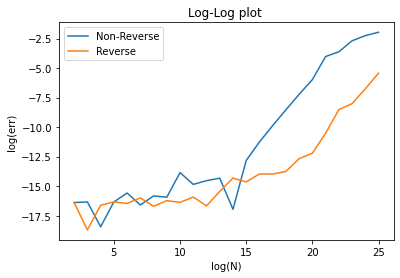

In [15]:
x_space = list(range(1, 26))
plt.plot(x_space, np.log(err_1), label="Non-Reverse")
plt.plot(x_space, np.log(err_2), label="Reverse")
plt.xlabel("log(N)")
plt.ylabel("log(err)")
plt.title("Log-Log plot ")
plt.legend()
plt.show()

Here we can see the error with reversed order addition is much smaller.